In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("apps.csv")

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print("jumlah dataset: %d baris dan %d kolom" % df.shape)

jumlah dataset: 9659 baris dan 14 kolom


In [8]:
# melihat kolom categorical dan numerical

df_num = df.select_dtypes(exclude=["object"])
df_cat = df.select_dtypes(include=["object"])

def printColumnTypes(num_col, non_num_col ):
    
    print("Numerical columns")
    for i in num_col:
        print(f"{i}")
        
    print("")
    
    print("Non_Numerical columns")
    for j in non_num_col:
        print(f"{j}")
        
printColumnTypes(df_num, df_cat)

Numerical columns
Unnamed: 0
Rating
Reviews
Size

Non_Numerical columns
App
Category
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 679.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [9]:
df.describe(include = "O")

,App,Category,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,9659,9659,9659,9659,9659,9659,9651,9657
unique,9659,33,21,2,92,6,118,1377,2769,33
top,Snapseed,FAMILY,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1832,1417,8903,8903,7903,826,252,1055,2202


- Jika dilihat lebih jauh ada kolom yang memiliki tipe data tidak sesuai
- Ada di kolom Price dan Install yang memiliki tupe data object karena memiliki imbuhan karakter lain

In [12]:
df["Price"].value_counts().head()

0        8903
$0.99     145
$2.99     124
$1.99      73
$4.99      70
Name: Price, dtype: int64

In [13]:
df["Installs"].value_counts().head()

1,000,000+     1417
100,000+       1112
10,000+        1031
10,000,000+     937
1,000+          888
Name: Installs, dtype: int64

In [11]:
# khusus di kolom Install dan Price dikarenakan value pada kolom ada imbuhan lain selain angka
# sehingga akan dilakukan data cleaning pada nilai di kolom Install dan Price

In [16]:
# karakter yang ingin dihapus dari value di kolom Price dan Installs
char_remove = [".", ",", "+", "$"]

# list kolom
list_kolom = ["Installs", "Price"]


for col in list_kolom:       # looping kolom
    for char in char_remove: # looping karakter 
        df[col] = df[col].apply(lambda x: x.replace(char, ""))
        # mengganti semua karakter di char_remove dengan string kosong
    

In [11]:
df["Price"].value_counts().head()

0        8903
$0.99     145
$2.99     124
$1.99      73
$4.99      70
Name: Price, dtype: int64

In [10]:
df["Installs"].value_counts().head()

1,000,000+     1417
100,000+       1112
10,000+        1031
10,000,000+     937
1,000+          888
Name: Installs, dtype: int64

- value pada kolom Price dan Install sudah sesuai yang diharapkan/ bernilai angka
- sekarang mengganti tipe data

In [20]:
# mengganti tipe data Install menjadi float

df["Installs"] = df["Installs"].astype(float)

In [21]:
# mengganti tipe data Price menjadi float

df["Price"] = df["Price"].astype(float)

In [22]:
# mengganti tipe data Last Updated menjadi datetime

df["Last Updated"] = df["Last Updated"].astype("datetime64")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   object        
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            8432 non-null   float64       
 6   Installs        9659 non-null   float64       
 7   Type            9659 non-null   object        
 8   Price           9659 non-null   float64       
 9   Content Rating  9659 non-null   object        
 10  Genres          9659 non-null   object        
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
me

- drop kolom Unnamed: 0
- karena tidak digunakan dalam analisis

In [25]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [29]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- cek outliers
- handling outliers bisa disesuaikan dengan keadaan

In [27]:
# temukan outliers dengan zscores

https://www.youtube.com/watch?v=22CAL6_2kGk&ab_channel=Sanbercode

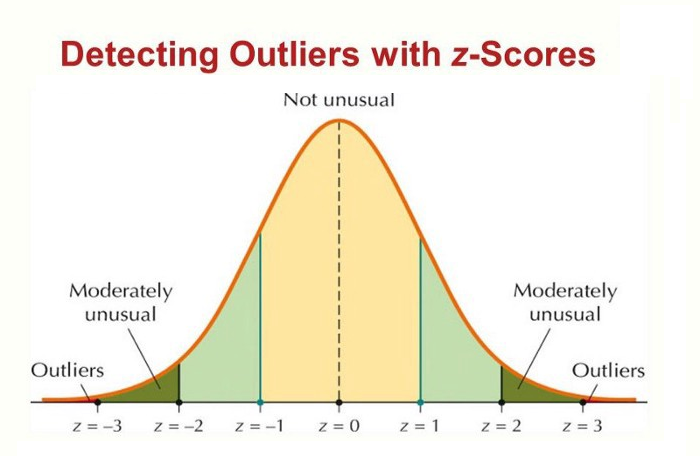

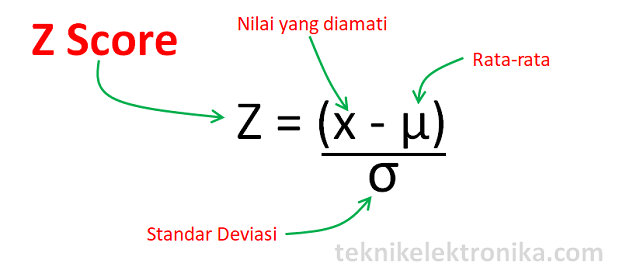

In [18]:
import scipy.stats
import numpy as np

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
zscore_rating = scipy.stats.zscore(df["Rating"])

In [33]:
df.loc[np.where(zscore_rating < 3)]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


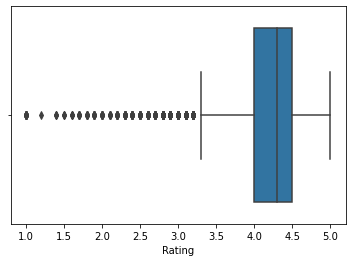

<Figure size 432x288 with 0 Axes>

In [71]:
# menggunakan boxplot

sns.boxplot(x = df["Rating"])
plt.show()
plt.savefig("outlier_rating.png")

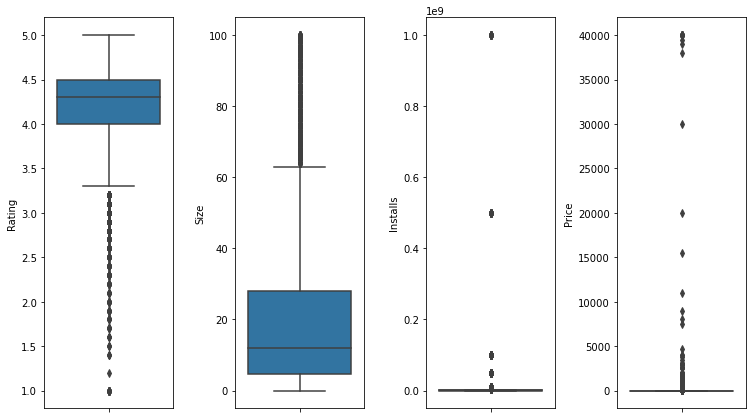

In [33]:
fig, axes = plt.subplots(1, 4, figsize = (11, 6.5))
fig.tight_layout(pad = 2.8)
sns.boxplot(y = df["Rating"], ax = axes[0])
sns.boxplot(y = df["Size"], ax = axes[1])
sns.boxplot(y = df["Installs"], ax = axes[2])
sns.boxplot(y = df["Price"], ax = axes[3])

plt.show()

In [34]:
df["Rating"].value_counts()

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
4.1    621
4.0    513
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.3     20
2.5     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.7      8
2.1      8
1.8      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

In [35]:
df["Size"].value_counts()

11.0    182
12.0    181
13.0    177
14.0    177
15.0    163
       ... 
89.0      9
87.0      9
86.0      7
75.0      7
90.0      6
Name: Size, Length: 191, dtype: int64

In [36]:
df.Size.unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,
         2.4,  27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,
         8.2,   9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,
         3.5,   4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,
         0. ,   6.5,   1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,
         8.3,   4.3,   4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,
        61. ,  66. ,   0.1,   8.4,  44. ,   0.7,   1.6,   6.2,  53. ,
         1.4,   3. ,   5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,
         4.4,   4.8,

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 716.9+ KB


In [38]:
# cek missing value

df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [42]:
def missing_col(df):
    total = 0
    for col in df.columns:
        miss_val = df[col].isnull().sum()
        total += miss_val
        if miss_val != 0:
            print(f"{col} => {df[col].isnull().sum()}")
        
    if total == 0:
        print("no missing values left")

missing_col(df)

Rating => 1463
Size => 1227
Current Ver => 8
Android Ver => 2


In [39]:
sum(df.isnull().any(axis=1))

2638

In [43]:
def perc_missing(df):
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct !=0):
            print("{} => {}%".format(col, round(pct, 2)))
            
perc_missing(df)

Rating => 15.15%
Size => 12.7%
Current Ver => 0.08%
Android Ver => 0.02%


In [40]:
# menghitung berapa % missing value pada kolom rating

ratemiss_rating = (df["Rating"].isnull().sum()/len(df))*100
ratemiss_size = (df["Size"].isnull().sum()/len(df))*100

In [41]:
print("%missing value Rating =", ratemiss_rating)
print("%missing value Size =", ratemiss_size)

%missing value Rating = 15.146495496428203
%missing value Size = 12.703178382855368


In [42]:
# jumlah missing value pada kolom rating dan size jumlahnya tidak sampai 50%
# sehingga untuk handle missing value tsb akan dilakukan fill

In [43]:
# ada beberapa missing value di beberapa kolom, seperti rating, size dan android ver

In [44]:
# handling missing value

df["Rating"].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [45]:
Q1 = 4
Q3 = 4.5

IQR= Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q3 - (1.5 * IQR)

print("Rating")
print("IQR = ", IQR)
print("Upper fence =", upper_fence)
print("Lower fence =", lower_fence)

Rating
IQR =  0.5
Upper fence = 5.25
Lower fence = 3.75


In [46]:
df[(df["Rating"] < lower_fence) | (df["Rating"] > upper_fence)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7,5000.0,Free,0.0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
71,SK Enca Direct Malls - Used Cars Search,AUTO_AND_VEHICLES,3.6,1379,16.0,500000.0,Free,0.0,Everyone,Auto & Vehicles,2018-08-02,2.2.21,4.2 and up
84,Used car search Goo net whole car Go to net,AUTO_AND_VEHICLES,3.7,5414,18.0,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-23,3.20.1,4.4 and up
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-04-27,1.4,4.0.3 and up
91,SKencar,AUTO_AND_VEHICLES,3.7,4806,35.0,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-31,4.0.3,4.0.3 and up


In [47]:
# mengisi missing value pada kolom rating dengan median karena terdapat outliers

df["Rating"].fillna(df["Rating"].median(), inplace = True)

In [48]:
df["Size"].describe()

count    8432.000000
mean       20.395327
std        21.827509
min         0.000000
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

In [49]:
Q1 = 4.6
Q3 = 28

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print("Size")
print("IQR =",IQR)
print("Upper fence =",upper_fence)
print("Lower fence =",lower_fence)

Size
IQR = 23.4
Upper fence = 63.099999999999994
Lower fence = -30.499999999999993


In [50]:
df[(df["Size"] > upper_fence) | (df["Size"] < lower_fence)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
169,English Persian Dictionary,BOOKS_AND_REFERENCE,4.5,26875,73.0,500000.0,Free,0.0,Everyone,Books & Reference,2018-08-01,6.0.8,4.0.3 and up
344,Microsoft Edge,COMMUNICATION,4.3,27187,66.0,5000000.0,Free,0.0,Everyone,Communication,2018-07-28,42.0.0.2059,4.4 and up
499,"iPair-Meet, Chat, Dating",DATING,4.5,182986,77.0,5000000.0,Free,0.0,Mature 17+,Dating,2018-08-02,5.0.8,4.1 and up
514,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up
601,Free intellectual training game application |,EDUCATION,4.2,5741,84.0,1000000.0,Free,0.0,Everyone,Education;Pretend Play,2018-07-25,3.7.0,4.4 and up


In [51]:
# mengisi missing value pada kolom Size dengan median karena terdapat outliers

df["Size"].fillna(df["Size"].median, inplace = True)

In [52]:
# missing value di rating dan size sudah di fill

In [44]:
df.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [45]:
# cek duplikasi data

df.duplicated().value_counts()

False    9659
dtype: int64

In [47]:
df.duplicated().any()

False

In [46]:
df[df.duplicated()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [56]:
# tidak ada data duplikasi pada data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 679.2+ KB


In [50]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [52]:
df.describe(include = "O")

,App,Category,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,9659,9659,9659,9659,9659,9659,9651,9657
unique,9659,33,21,2,92,6,118,1377,2769,33
top,Snapseed,FAMILY,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1832,1417,8903,8903,7903,826,252,1055,2202


In [57]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


<AxesSubplot:>

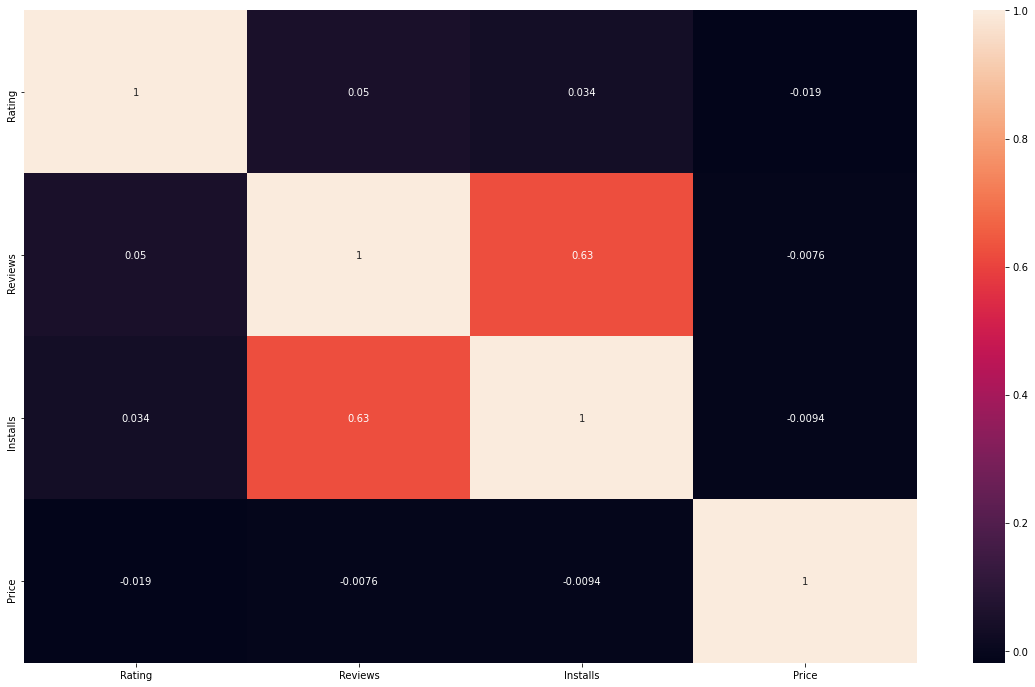

In [58]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), annot = True)

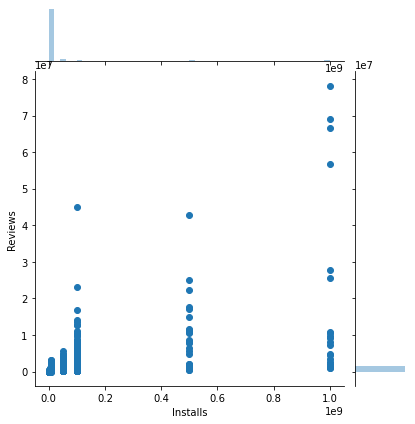

In [59]:
sns.jointplot(x = "Installs",
             y = "Reviews",
             data = df
             )
plt.show()

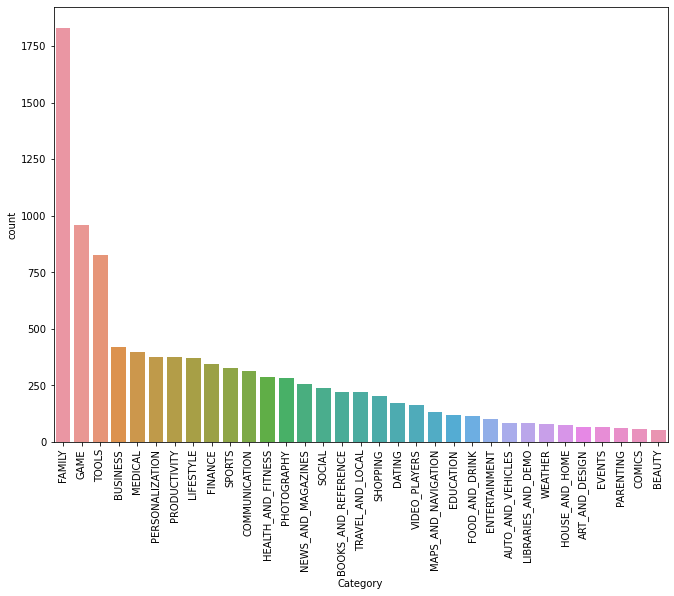

In [60]:
plt.figure(figsize = (11, 8))
sns.countplot(x = df["Category"],
             order = df["Category"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

- dari category apps, family menjadi aplikasi paling banyak yang ada di android apps

In [62]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [63]:
df["Type"].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

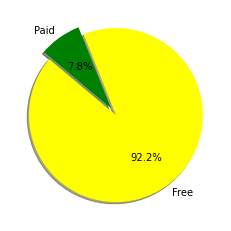

In [53]:
labels = "Free", "Paid"
sizes = [8903, 756]
explode = (0, 0.1)

plt.pie(sizes, labels = labels, explode = explode,
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 140,
       colors = ["yellow", "green"])
plt.show()

In [65]:
pd.crosstab(index = df["Type"], columns = "Installs", values = df["Installs"], aggfunc = sum)

col_0,Installs
Type,
Free,7.506557e+10
Paid,5.736488e+07


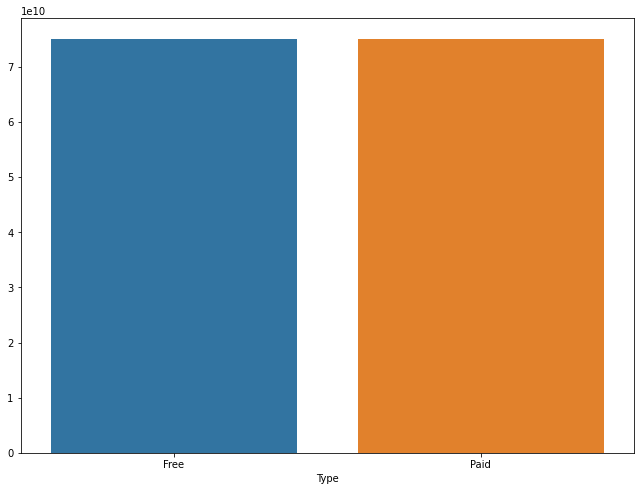

In [66]:
plt.figure(figsize = (11, 8))
sns.barplot(x = df["Type"],
           y = df["Installs"].sum())

plt.show()

In [67]:
df_paid = df[df["Type"] == "Paid"]

In [68]:
rfp = pd.crosstab(index = df["Type"], columns = "Rating (Mean)", values = df["Rating"], aggfunc = "mean")

In [69]:
rfp

col_0,Rating (Mean)
Type,
Free,4.186050
Paid,4.267725
